# Simple linear Regression

- Dataset: Salary_dataset.csv

### Columns:

- #: int
- YearsExperience : float
- Salary: float



### Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [28]:
PATH_CSV ='I:\OneDrive - DP World\Sources\Python\ml_project\data\Salary_dataset.csv'
df = pd.read_csv(PATH_CSV)

In [29]:
df.head()

,Num,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [30]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Num              30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [31]:
df.describe()

,Num,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


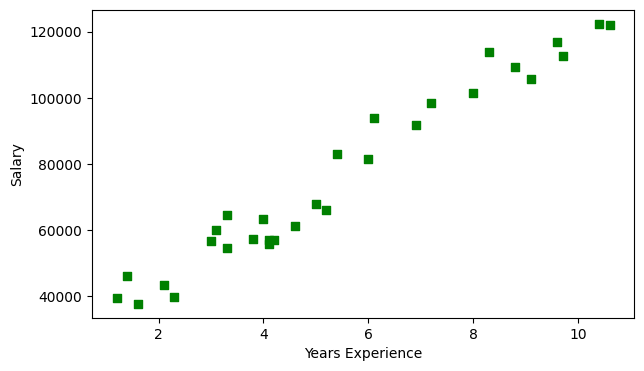

In [32]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(data=df, y='Salary', x='YearsExperience', marker='s', color='green', s=40)
plt.ylabel('Salary')
plt.xlabel("Years Experience")
plt.show()

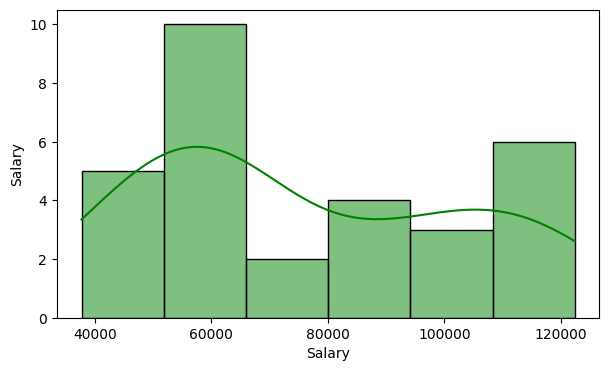

In [33]:
fig, ax = plt.subplots(figsize=(7,4))
sns.histplot(data=df['Salary'], color='green', kde=True)
plt.ylabel('Salary')
plt.show()

### Extract data for the dependent variable (y) and the explanatory variable (X)

In [34]:
y = df['Salary']
X = df['YearsExperience']

In [35]:
X = sm.add_constant(X)

In [36]:
# create model
model = sm.OLS(y, X)
reg_res = model.fit()
reg_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 10 Feb 2026   Prob (F-statistic):           1.14e-20
Time:                        15:12:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#the first number is an F-statistic and that the second is the p-value.
fstatistic, pvalue = sm.stats.linear_rainbow(reg_res)
print(f"R-squared: {reg_res.rsquared:.4f}")
print(f"F-Statistic: {fstatistic:.4f}")
print(f"P-Value: {pvalue:.4f}")

R-squared: 0.9570
F-Statistic: 0.7158
P-Value: 0.7346


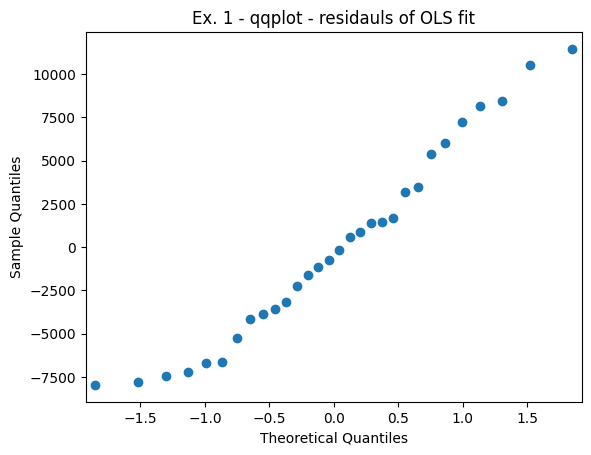

In [43]:
# residuals
res = reg_res.resid
pplot = sm.ProbPlot(res)
fig = pplot.qqplot()
h = plt.title("Ex. 1 - qqplot - residauls of OLS fit")
plt.show()